# Ports json to pandas

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (20, 12),})

# Hosts connections

In [8]:
p = pd.read_csv('ports.csv', sep='|')

# strip indexes from whitespaces
# p.rename(columns=lambda x: x.strip(), inplace=True)
p.columns = p.columns.str.strip()
p = p[['Name', 'Status', 'Type', 'WWN', 'IO_Ports']]
p.drop([0, 66], inplace=True)

# strip data from whitespaces
for col in p.keys().to_list():
    p[col]=p[col].str.strip()

# eval strings to list of strigs
p.WWN = p.WWN.apply(eval)
p.IO_Ports = p.IO_Ports.apply(eval)

# IO_Ports list to separate collumns
tdf = pd.DataFrame(p.IO_Ports.tolist())
for col in tdf.columns.tolist():
    tdf[col] = tdf[col].str.lstrip('I') #<-lstrip I from ports name
    p['IO_Ports'+str(col)] = tdf[col]
    
del tdf
p.drop(['IO_Ports'], axis=1, inplace=True)

# None type is not good for np
p.fillna(value=np.nan, inplace=True)

#p.set_index('Name',inplace=True)
p

,Name,Status,Type,WWN,IO_Ports0,IO_Ports1,IO_Ports2,IO_Ports3
1,as04_vios3,online,pSeries,"[21000024FF79ECC4, 21000024FF79ED98]",0301,0231,NaN,NaN
2,as04_vios4,online,pSeries,"[21000024FF792830, 21000024FF779904]",0331,0311,0211,0201
3,czas0016,online,iSeries,"[10000000C9BA965E, 10000000C9BA965F, 10000090F...",0200,0330,NaN,NaN
4,czas0016_I3,online,iSeries,"[10000000C9BA9B4C, 10000000C9BA8544]",0340,0240,NaN,NaN
5,czas0016_i1,online,iSeries,"[10000000C9BA9B4B, 10000000C9BA9B71]",0001,0131,NaN,NaN
...,...,...,...,...,...,...,...,...
61,czas0130,offline,iSeries,"[C050760926DE0198, C050760926DE0196]",NaN,NaN,NaN,NaN
62,czas0133,offline,iSeries,"[C050760926DE01E8, C050760926DE01EA]",NaN,NaN,NaN,NaN
63,czas0135,offline,iSeries,"[C050760926DE01F2, C050760926DE01F0]",NaN,NaN,NaN,NaN
64,czas0137,offline,iSeries,"[C050760926DE01F4, C050760926DE01F6]",NaN,NaN,NaN,NaN


In [39]:
port = '0131'
p[(p.IO_Ports0 == port) | (p.IO_Ports1 == port) | (p.IO_Ports2 == port) | (p.IO_Ports3 == port)]

,Name,Status,Type,WWN,IO_Ports0,IO_Ports1,IO_Ports2,IO_Ports3
5,czas0016_i1,online,iSeries,"[10000000C9BA9B4B, 10000000C9BA9B71]",0001,0131,NaN,NaN
11,czas0019_i1,online,iSeries,"[C050760409810016, C050760409810014]",0131,0001,NaN,NaN
18,czas0022_i1,online,iSeries,"[C050760409810028, C05076040981002E]",0131,0001,NaN,NaN
22,czas0025_i3,online,iSeries,"[C050760926DE007B, C050760926DE007A, C05076092...",0131,0001,NaN,NaN


In [40]:
p[(p.Status == 'offline') & (p.IO_Ports0 == '0131')]

,Name,Status,Type,WWN,IO_Ports0,IO_Ports1,IO_Ports2,IO_Ports3


In [42]:
print(p[(p.IO_Ports3 == np.nan)])

Empty DataFrame
Columns: [Name, Status, Type, WWN, IO_Ports0, IO_Ports1, IO_Ports2, IO_Ports3]
Index: []


In [54]:
p[(p.IO_Ports0 == '0131')]['Name'].tolist()

['czas0019_i1', 'czas0022_i1', 'czas0025_i3']

In [52]:
p.loc[p.IO_Ports0 == '0131']

,Name,Status,Type,WWN,IO_Ports0,IO_Ports1,IO_Ports2,IO_Ports3
11,czas0019_i1,online,iSeries,"[C050760409810016, C050760409810014]",0131,0001,NaN,NaN
18,czas0022_i1,online,iSeries,"[C050760409810028, C05076040981002E]",0131,0001,NaN,NaN
22,czas0025_i3,online,iSeries,"[C050760926DE007B, C050760926DE007A, C05076092...",0131,0001,NaN,NaN


In [25]:
print(p.loc['czas0019_i1']['IO_Ports2'])

None


In [181]:
p.IO_Ports0 = p.IO_Ports0.astype('str')
p.IO_Ports1 = p.IO_Ports1.astype('str')

In [182]:
p[['IO_Ports0', 'IO_Ports1']].str.match('0131')

AttributeError: 'DataFrame' object has no attribute 'str'

# df main dataframe

In [9]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (20, 12),})

df = pd.read_json('data1.json')
metricDetails = df['metricDetails'][0]
df.drop([0],inplace=True)
df.drop(columns=['metricDetails','resourceID','deviceId','startTime','endTime'],inplace=True)
df['split'] = df['deviceName'].str.split('<br />')
df['portName'] = df['split'].apply(lambda x: x[0])
df.deviceName = df.split.apply(lambda x: x[1])
df.drop(columns=['split'], inplace=True)
df[['componentId','metricId']] = df[['componentId','metricId']].astype('int32')

# Trvale nulová hodnota nás nezajíma...
print('Shape with null values   ', df.shape)
df = df[df.maxValue > 0]
print('Shape without null values', df.shape)

df.info()

Shape with null values    (816, 10)
Shape without null values (234, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 810
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   componentId  234 non-null    int32  
 1   current      234 non-null    object 
 2   deviceName   234 non-null    object 
 3   label        234 non-null    object 
 4   maxValue     234 non-null    float64
 5   metricId     234 non-null    int32  
 6   minValue     234 non-null    float64
 7   precision    234 non-null    float64
 8   units        234 non-null    object 
 9   portName     234 non-null    object 
dtypes: float64(3), int32(2), object(5)
memory usage: 18.3+ KB


# What data we collect?

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 810
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   componentId  234 non-null    int32  
 1   current      234 non-null    object 
 2   deviceName   234 non-null    object 
 3   label        234 non-null    object 
 4   maxValue     234 non-null    float64
 5   metricId     234 non-null    int32  
 6   minValue     234 non-null    float64
 7   precision    234 non-null    float64
 8   units        234 non-null    object 
 9   portName     234 non-null    object 
dtypes: float64(3), int32(2), object(5)
memory usage: 18.3+ KB


In [8]:
df.sort_values(by=['portName'])

,componentId,current,deviceName,label,maxValue,metricId,minValue,precision,units,portName
810,773186,"[{'x': 1585177202000, 'y': 8.77}, {'x': 158517...",SI-IBM.2107-75HVG61,Port Receive Transfer Size,58.832,867,4.551,3.0,KiB/op,0000
803,773186,"[{'x': 1585177202000, 'y': 639.77}, {'x': 1585...",SI-IBM.2107-75HVG61,Port Receive I/O Rate,4166.870,853,246.050,2.0,ops/s,0000
808,773186,"[{'x': 1585177202000, 'y': 0.04}, {'x': 158517...",SI-IBM.2107-75HVG61,Port Receive Response Time,0.250,864,0.030,2.0,ms/op,0000
806,773186,"[{'x': 1585177202000, 'y': 5.48}, {'x': 158517...",SI-IBM.2107-75HVG61,Port Receive Data Rate,224.740,859,1.300,2.0,MiB/s,0000
804,773186,"[{'x': 1585177202000, 'y': 639.77}, {'x': 1585...",SI-IBM.2107-75HVG61,Total Port I/O Rate,4166.870,854,246.050,2.0,ops/s,0000
...,...,...,...,...,...,...,...,...,...,...
278,448214,"[{'x': 1585177202000, 'y': 0.33}, {'x': 158517...",SI-IBM.2107-75HVG61,Port Send Data Rate,177.990,858,0.000,2.0,MiB/s,0331
279,448214,"[{'x': 1585177202000, 'y': 0.30000000000000004...",SI-IBM.2107-75HVG61,Port Receive Data Rate,29.210,859,0.000,2.0,MiB/s,0331
280,448214,"[{'x': 1585177202000, 'y': 0.03}, {'x': 158517...",SI-IBM.2107-75HVG61,Port Send Response Time,0.620,863,0.000,2.0,ms/op,0331
283,448214,"[{'x': 1585177202000, 'y': 4.003}, {'x': 15851...",SI-IBM.2107-75HVG61,Port Receive Transfer Size,128.000,867,0.000,3.0,KiB/op,0331


# What ports we have?

In [187]:
set(df.portName.to_list())

{'0000',
 '0001',
 '0030',
 '0031',
 '0032',
 '0033',
 '0100',
 '0101',
 '0102',
 '0103',
 '0130',
 '0131',
 '0200',
 '0201',
 '0210',
 '0211',
 '0230',
 '0231',
 '0232',
 '0233',
 '0300',
 '0301',
 '0302',
 '0303',
 '0310',
 '0311',
 '0330',
 '0331'}

In [10]:
def port2hots(port):
    hosts = set(p[(p.IO_Ports0 == port) | (p.IO_Ports1 == port) | (p.IO_Ports2 == port) | (p.IO_Ports3 == port)]['Name'].tolist())
    if hosts:
        return hosts
    else:
        return np.nan
    
port_names = set(df.portName.to_list())
for port in port_names:
    print(port,': ',port2hots(port))
    print('-'*80)  

0001 :  {'czas0025_i3', 'czas0016_i1', 'czas0022_i1', 'czas0019_i1'}
--------------------------------------------------------------------------------
0033 :  {'czas0053_i1', 'czas0053_i4', 'czas0054_i1', 'czas0026_i3'}
--------------------------------------------------------------------------------
0230 :  nan
--------------------------------------------------------------------------------
0302 :  {'czas0053_i3', 'czas0054_i2'}
--------------------------------------------------------------------------------
0331 :  {'czas0026_i2', 'czas0025_i2', 'as04_vios4'}
--------------------------------------------------------------------------------
0210 :  nan
--------------------------------------------------------------------------------
0300 :  nan
--------------------------------------------------------------------------------
0000 :  nan
--------------------------------------------------------------------------------
0231 :  {'czas0054_i4', 'czas0053_i2', 'as04_vios3', 'czas0100'}
---------

In [98]:
df['hosts'] = df['portName'].apply(lambda x: port2hots(x))
df

,componentId,current,deviceName,label,maxValue,metricId,minValue,precision,units,portName,hosts
1,226913,"[{'x': 1585177202000, 'y': 0.0}, {'x': 1585177...",SI-IBM.2107-75HVG61,Zero Send Buffer Credit Percentage,8.330,1036,0.000,2.0,%,0033,"{czas0054_i1, czas0053_i4, czas0026_i3, czas00..."
3,226913,"[{'x': 1585177202000, 'y': 126.47}, {'x': 1585...",SI-IBM.2107-75HVG61,Port Send I/O Rate,6283.630,852,0.500,2.0,ops/s,0033,"{czas0054_i1, czas0053_i4, czas0026_i3, czas00..."
4,226913,"[{'x': 1585177202000, 'y': 172.27}, {'x': 1585...",SI-IBM.2107-75HVG61,Port Receive I/O Rate,6297.600,853,4.170,2.0,ops/s,0033,"{czas0054_i1, czas0053_i4, czas0026_i3, czas00..."
5,226913,"[{'x': 1585177202000, 'y': 298.73}, {'x': 1585...",SI-IBM.2107-75HVG61,Total Port I/O Rate,12581.230,854,4.930,2.0,ops/s,0033,"{czas0054_i1, czas0053_i4, czas0026_i3, czas00..."
6,226913,"[{'x': 1585177202000, 'y': 1.77}, {'x': 158517...",SI-IBM.2107-75HVG61,Port Send Data Rate,146.590,858,0.000,2.0,MiB/s,0033,"{czas0054_i1, czas0053_i4, czas0026_i3, czas00..."
...,...,...,...,...,...,...,...,...,...,...,...
803,773186,"[{'x': 1585177202000, 'y': 639.77}, {'x': 1585...",SI-IBM.2107-75HVG61,Port Receive I/O Rate,4166.870,853,246.050,2.0,ops/s,0000,NaN
804,773186,"[{'x': 1585177202000, 'y': 639.77}, {'x': 1585...",SI-IBM.2107-75HVG61,Total Port I/O Rate,4166.870,854,246.050,2.0,ops/s,0000,NaN
806,773186,"[{'x': 1585177202000, 'y': 5.48}, {'x': 158517...",SI-IBM.2107-75HVG61,Port Receive Data Rate,224.740,859,1.300,2.0,MiB/s,0000,NaN
808,773186,"[{'x': 1585177202000, 'y': 0.04}, {'x': 158517...",SI-IBM.2107-75HVG61,Port Receive Response Time,0.250,864,0.030,2.0,ms/op,0000,NaN


# What metric we collect?

In [12]:
pd.DataFrame(metricDetails).T

,description,name,units
1036,The percentage of time that a port on a DS8000...,Zero Send Buffer Credit Percentage,%
1037,The percentage of time that a port on a DS8000...,Zero Receive Buffer Credit Percentage,%
852,"Average number of send operations per second, ...",Port Send I/O Rate,ops/s
853,Average number of receive operations per secon...,Port Receive I/O Rate,ops/s
854,Average number of I/O operations processed per...,Total Port I/O Rate,ops/s
858,Average number of mebibytes (2^20 bytes) sent ...,Port Send Data Rate,MiB/s
859,Average number of mebibytes (2^20 bytes) recei...,Port Receive Data Rate,MiB/s
863,Average number of milliseconds that it took to...,Port Send Response Time,ms/op
864,Average number of milliseconds that it took to...,Port Receive Response Time,ms/op
866,Average number of kilobytes (2^10 bytes) sent ...,Port Send Transfer Size,KiB/op


# All ports data for chosen metricId for 24hour

In [18]:
metricId = 854 # Total Port I/O Rate

In [11]:
metricId = 854 # Total Port I/O Rate
portNames = sorted(list(set(df.portName.to_list())))
port_io = pd.DataFrame(df[(df['portName'] == portNames[0]) & (df.metricId == metricId)]['current'].to_list()[0], columns=['x'])
port_io['time'] = port_io['x'].apply(lambda x: dt.datetime.fromtimestamp(x/1e3))
port_io.drop(columns=['x'], inplace=True)

for portName in portNames[1:]:
    port_io[portName] = pd.DataFrame(df[(df['portName'] == portName) & (df.metricId == metricId)]['current'].to_list()[0], columns=['y'])

port_io.set_index('time', inplace=True)
port_io

,0001,0030,0031,0032,0033,0100,0101,0102,0103,0130,...,0232,0233,0300,0301,0302,0303,0310,0311,0330,0331
time,,,,,,,,,,,,,,,,,,,,,
2020-03-25 23:00:02,25.05,4211.38,539.70,67.50,298.73,3163.45,488.57,74.03,286.93,461.42,...,1972.93,0.00,3463.13,380.10,1903.27,0.00,477.10,633.65,2068.62,159.02
2020-03-25 23:01:01,15.05,5629.23,72.90,10.73,32.52,4047.37,46.98,29.27,30.87,206.67,...,672.98,0.00,4098.45,163.23,656.08,0.00,213.35,747.25,2270.90,161.73
2020-03-25 23:02:01,505.25,3326.37,10.93,8.13,37.73,2502.98,7.58,10.70,32.00,286.70,...,605.67,0.55,2425.92,96.77,554.53,0.52,331.25,2606.55,6662.60,1244.38
2020-03-25 23:03:01,347.88,3660.95,29.43,6.23,17.13,2746.50,28.85,7.83,14.52,406.27,...,590.85,0.00,2829.78,129.35,588.45,0.00,423.58,3600.83,6071.10,3074.53
2020-03-25 23:04:02,287.97,3041.33,12.47,8.50,15.82,2311.72,12.82,9.58,15.33,425.28,...,599.03,0.00,2332.02,105.72,587.30,0.00,467.70,1394.53,1810.73,1071.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-26 22:54:01,10.92,2701.18,17.32,8.57,12.60,2056.67,10.33,11.82,12.23,628.27,...,2357.52,0.00,1998.00,131.28,2228.08,0.00,722.95,6391.08,7748.23,6530.43
2020-03-26 22:55:01,24.92,2891.58,6.63,5.93,7.77,2153.50,3.60,9.10,7.58,800.13,...,2312.48,0.00,2138.03,589.13,2277.88,0.00,891.55,5094.02,6071.67,4609.77
2020-03-26 22:56:01,9.12,2642.05,7.05,4.42,7.13,2181.63,5.67,9.85,8.25,833.18,...,2264.57,0.00,2232.60,53.15,2352.98,0.00,888.47,3682.72,5256.52,3433.00


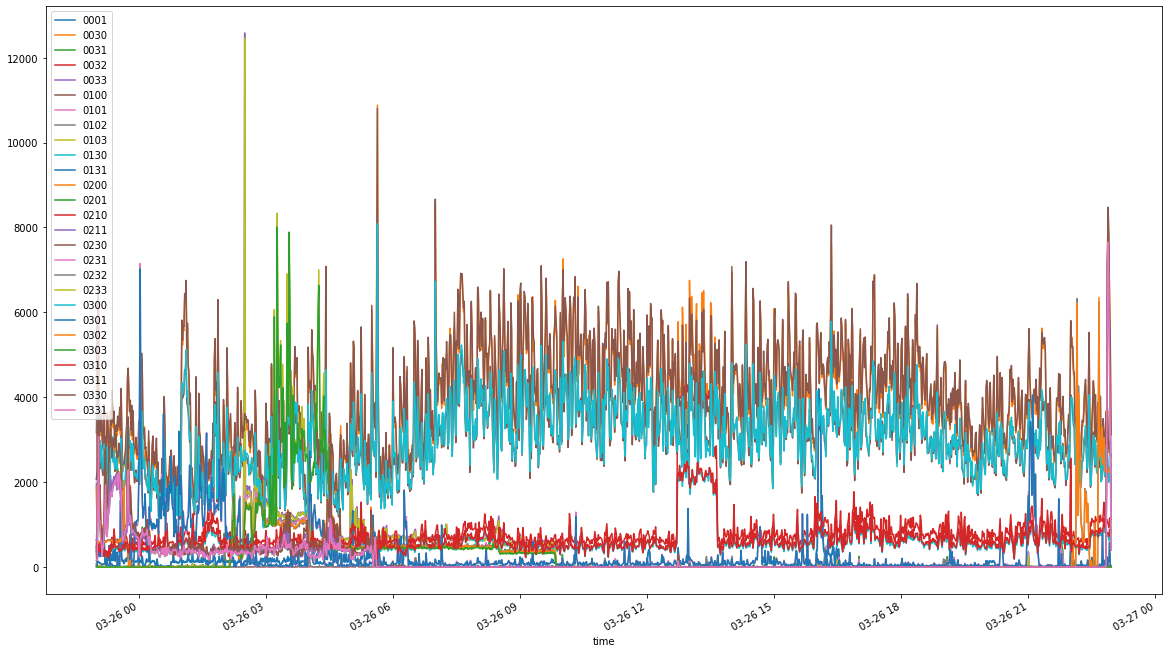

In [33]:
# All data in one nonsense graph
port_io.plot();

# Total Port I/O Rate (with hosts) per day (sorted by median)

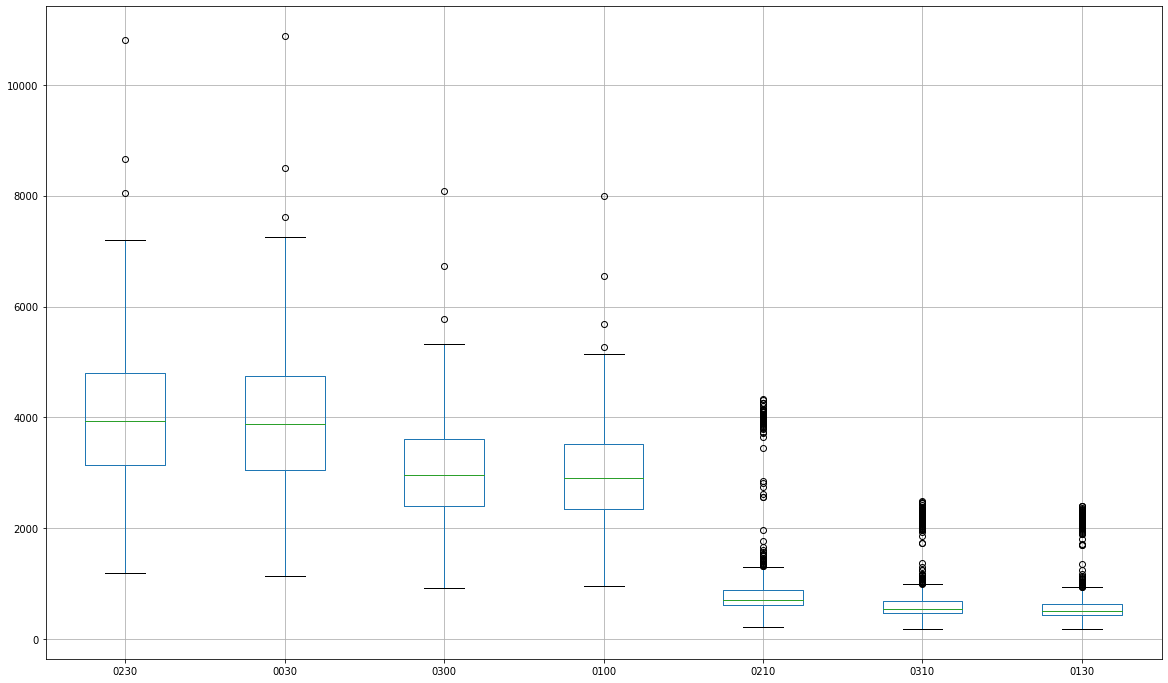

In [32]:
pprc_ports = piod.sort_values(by=['50%'], ascending=False).hosts.iloc[:7].index.tolist()
port_io[pprc_ports].boxplot()

In [14]:
piod = port_io.describe().T
piod['hosts'] = piod.index
piod['hosts'] = piod['hosts'].apply(lambda x: port2hots(x))
piod.sort_values(by=['50%'], ascending=False)

,count,mean,std,min,25%,50%,75%,max,hosts
0230,1438.0,4008.262559,1209.195458,1192.98,3138.7500,3942.925,4798.0100,10808.18,NaN
0030,1438.0,3936.826627,1216.275933,1146.47,3057.9200,3886.500,4755.3025,10879.45,NaN
0300,1438.0,3005.850007,851.843803,920.88,2399.3400,2956.310,3605.4950,8085.08,NaN
0100,1438.0,2946.759910,841.189554,953.28,2349.3825,2901.990,3513.1900,8000.27,NaN
0210,1438.0,876.867879,648.845939,228.00,610.3325,712.225,891.1350,4336.23,NaN
0310,1438.0,642.136516,351.817879,181.47,471.5850,547.155,682.9300,2485.97,NaN
0130,1438.0,599.161453,344.101337,183.78,434.7100,509.300,638.4150,2410.57,NaN
0231,1438.0,278.775883,547.156564,4.47,39.4325,69.815,155.7350,7150.72,"{czas0054_i4, czas0053_i2, as04_vios3, czas0100}"
0301,1438.0,277.012844,550.265738,6.20,38.0550,66.520,154.2775,7023.35,"{czas0054_i4, czas0053_i2, as04_vios3, czas0100}"
0033,1438.0,295.279784,563.940528,4.93,7.7050,12.385,621.1350,12581.23,"{czas0053_i1, czas0053_i4, czas0054_i1, czas00..."


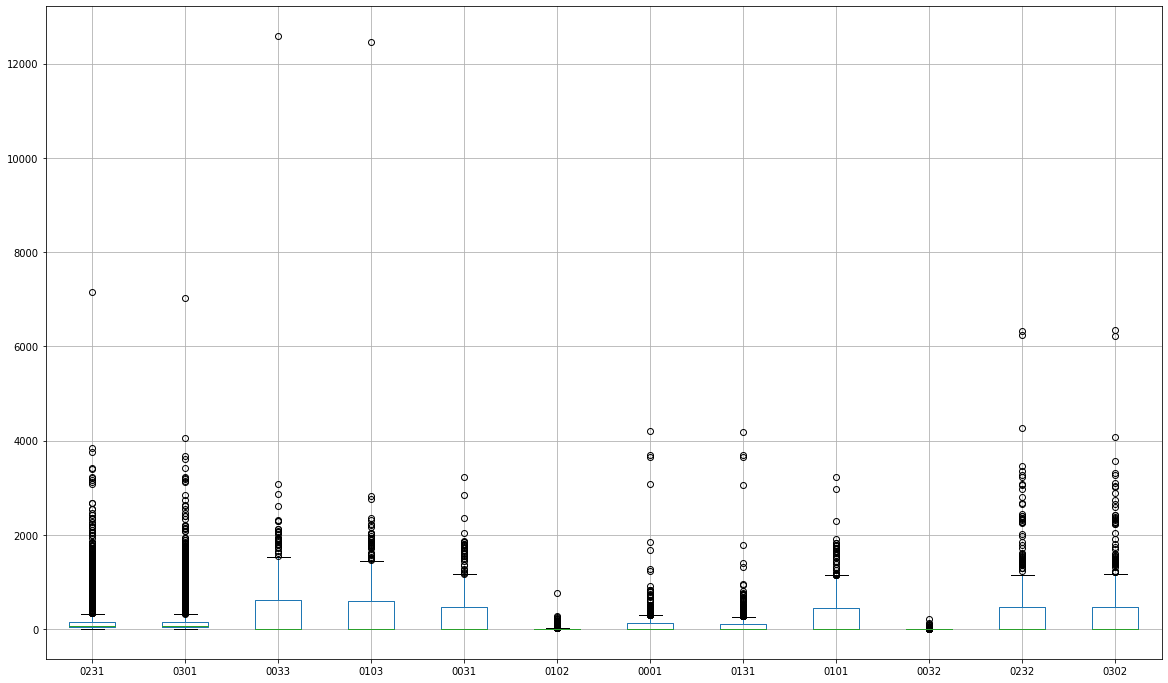

In [36]:
port_list = piod.sort_values(by=['50%'], ascending=False).hosts.iloc[7:19].index.to_list()
port_io[port_list].boxplot()

In [31]:
piod.sort_values(by=['50%'], ascending=False).hosts.iloc[:7].index.tolist()

['0230', '0030', '0300', '0100', '0210', '0310', '0130']

In [48]:
piod.sort_values(by=['75%'], ascending=False)

,count,mean,std,min,25%,50%,75%,max,hosts
0230,1438.0,4008.262559,1209.195458,1192.98,3138.7500,3942.925,4798.0100,10808.18,NaN
0030,1438.0,3936.826627,1216.275933,1146.47,3057.9200,3886.500,4755.3025,10879.45,NaN
0300,1438.0,3005.850007,851.843803,920.88,2399.3400,2956.310,3605.4950,8085.08,NaN
0100,1438.0,2946.759910,841.189554,953.28,2349.3825,2901.990,3513.1900,8000.27,NaN
0210,1438.0,876.867879,648.845939,228.00,610.3325,712.225,891.1350,4336.23,NaN
0310,1438.0,642.136516,351.817879,181.47,471.5850,547.155,682.9300,2485.97,NaN
0130,1438.0,599.161453,344.101337,183.78,434.7100,509.300,638.4150,2410.57,NaN
0033,1438.0,295.279784,563.940528,4.93,7.7050,12.385,621.1350,12581.23,"{czas0026_i3, czas0053_i1, czas0054_i1, czas00..."
0103,1438.0,284.369207,548.973381,4.98,7.4300,11.800,590.8775,12450.02,"{czas0026_i3, czas0053_i1, czas0054_i1, czas00..."
0232,1438.0,276.668421,519.113506,1.25,2.0500,2.980,477.1425,6321.80,"{czas0053_i3, czas0054_i2}"


In [132]:
for port in port_io.columns:
    print(port, port_io[port].mean(), port2hots(port))

0001 80.51166898470098 {'czas0019_i1', 'czas0022_i1', 'czas0016_i1', 'czas0025_i3'}
0030 3936.826627260083 nan
0031 222.83581363004174 {'czas0054', 'czas0106', 'czas0017_i1', 'czas0021_i1'}
0032 7.956397774687065 {'czas0053', 'czas0019', 'czas0026_i3'}
0033 295.2797844228094 {'czas0054_i1', 'czas0053_i4', 'czas0026_i3', 'czas0053_i1'}
0100 2946.759909596662 nan
0101 211.70462447844227 {'czas0054', 'czas0017_i1', 'czas0021_i1'}
0102 14.377197496522948 {'czas0053', 'czas0019', 'czas0106', 'czas0026_i3'}
0103 284.36920723226706 {'czas0054_i1', 'czas0053_i4', 'czas0026_i3', 'czas0053_i1'}
0130 599.1614534075104 nan
0131 76.5096314325452 {'czas0019_i1', 'czas0022_i1', 'czas0016_i1', 'czas0025_i3'}
0200 231.5535813630042 {'czas0016', 'czas0025', 'czas0026'}
0201 170.7863769123783 {'czas0025_i2', 'czas0026_i2', 'as04_vios4'}
0210 876.8678789986092 nan
0211 182.98105702364396 {'czas0026_i1', 'czas0025_i1', 'as04_vios4'}
0230 4008.2625591098754 nan
0231 278.7758831710709 {'czas0054_i4', 'as04_v

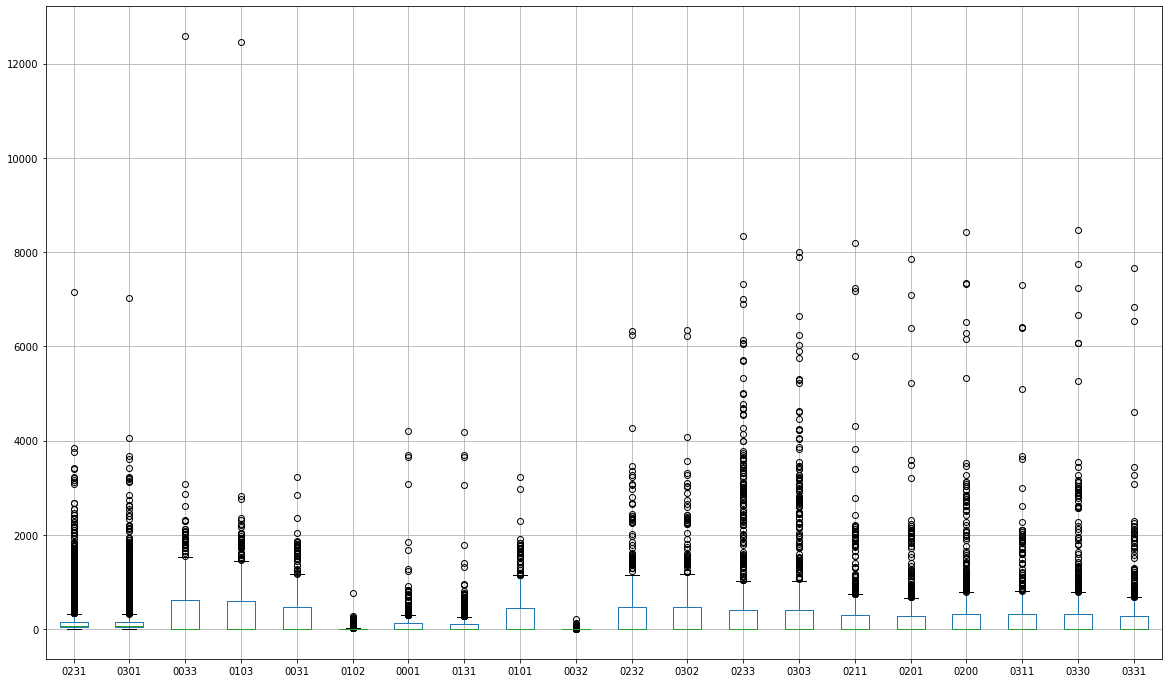

In [28]:
port_list = piod.sort_values(by=['50%'], ascending=False).hosts.loc['0231':].index.to_list()
port_io[port_list].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f2ba63970>,
      dtype=object)

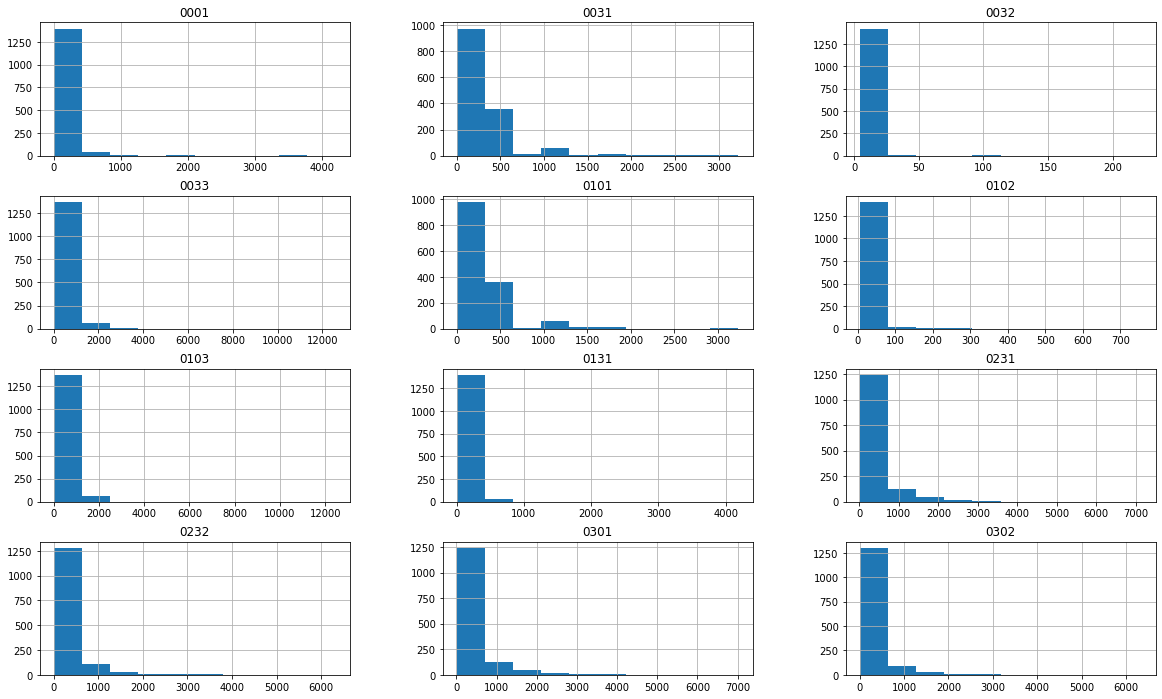

In [40]:
port_io[port_list].hist(bins=10)

# A box plot 

method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data. 

In [1]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10, 4),
                  columns=['Col1', 'Col2', 'Col3', 'Col4'])


NameError: name 'np' is not defined

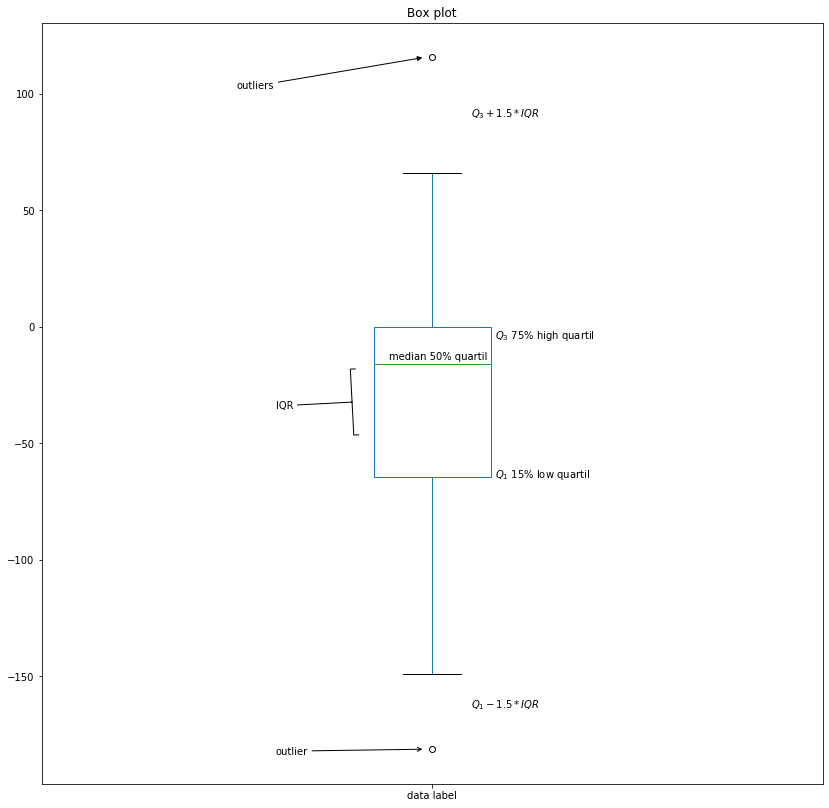

In [20]:
def example_boxplot(non_symmetric):
    """Generate an example box plot."""
 
    # find the quartiles and iqr
    q1_y, median_y, q3_y = non_symmetric.quantile([0.25, 0.5, 0.75])
    iqr = q3_y - q1_y

    # make the boxplot
    ax = non_symmetric.plot(kind='box', figsize=(14, 14), title='Box plot')

    # label the box
    ax.annotate('median 50% quartil', xy=(0.945, median_y + 2))
    ax.annotate(r'$Q_3$ 75% high quartil', xy=(1, q3_y), xytext=(1.08, q3_y - 5))
    ax.annotate(r'$Q_1$ 15% low quartil', xy=(1, q1_y), xytext=(1.08, q1_y))
    ax.annotate(
        'IQR', xy=(0.9, (q3_y + q1_y)/2), xytext=(0.8, (q3_y + q1_y)/2 - 2.85),
        arrowprops=dict(arrowstyle='-[, widthB=3.3, lengthB=0.5')
    )

    # label the whiskers
    ax.annotate(r'$Q_3 + 1.5 * IQR$', xy=(1.05, q3_y + 1.5 * iqr - 7))
    ax.annotate(r'$Q_1 - 1.5 * IQR$', xy=(1.05, q1_y - 1.5 * iqr - 2))

    # label the outliers
    ax.annotate(
        'outlier', xy=(0.99, non_symmetric.min()), xytext=(0.8, non_symmetric.min() - 2.1),
        arrowprops=dict(arrowstyle='->')
    )

    for i, val in enumerate(non_symmetric[non_symmetric > q3_y + 1.5*iqr]):
        if not i: 
            text = 'outliers' 
            x, y = 0.75, 102
        else:
            text = '' 
            x, y = 0.87, 103
        ax.annotate(
            text, xy=(0.99, val), xytext=(x, y),
            arrowprops=dict(facecolor='black', arrowstyle='-|>')
        )

    return ax

SIZE = 100
ns = pd.Series(np.random.gamma(7, 5, size=SIZE) * np.random.choice([-2.2, -1.85, 0, -0.4, 1.33], size=SIZE), name='data label')

example_boxplot(ns)

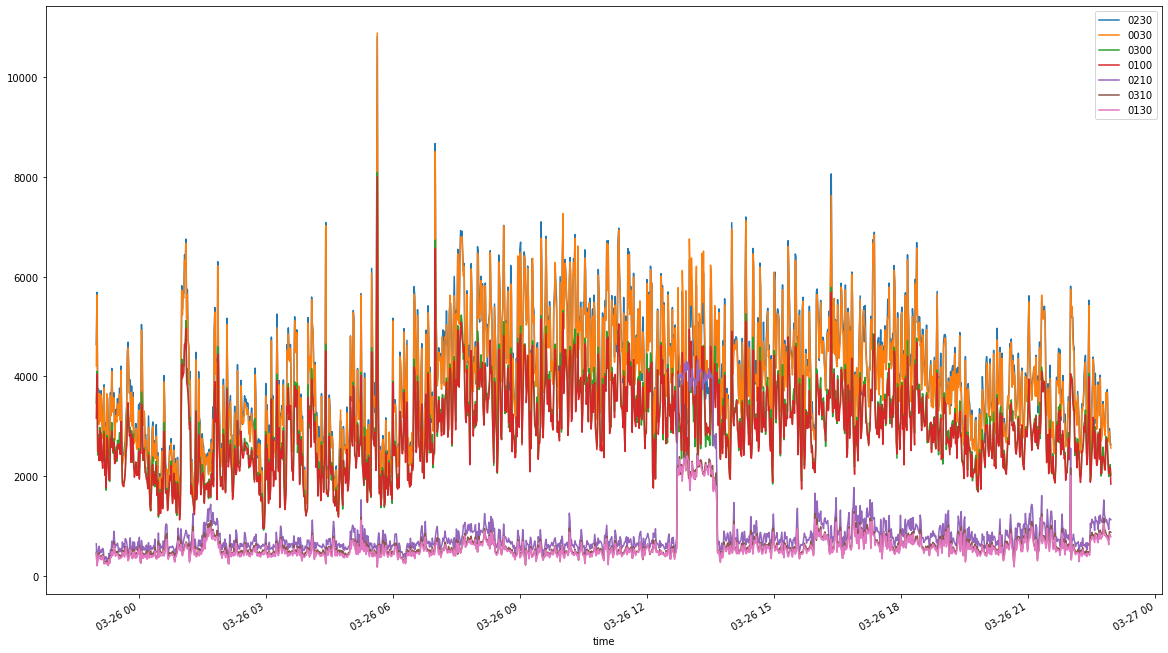

In [36]:
# PPRC?? ports
port_io[['0230','0030','0300','0100','0210','0310','0130']].plot();

{'czas0053_i2', 'czas0100', 'czas0054_i4', 'as04_vios3'}


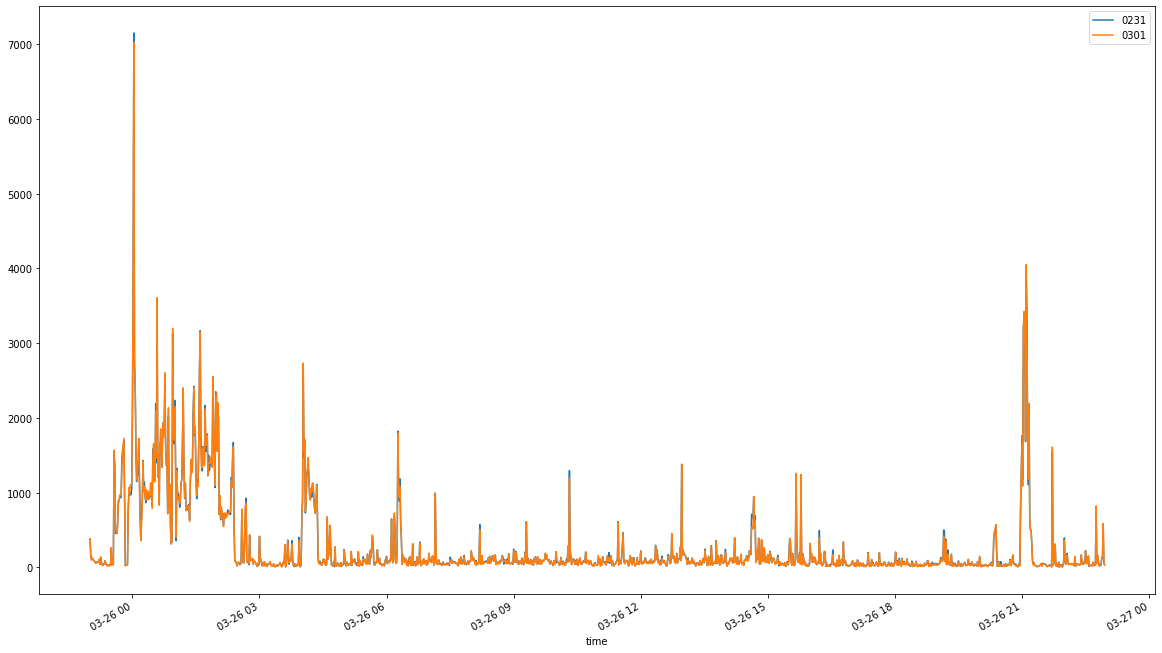

In [51]:
port_io[['0231','0301']].plot()
print(piod.hosts['0231'])

{'czas0026_i3', 'czas0053_i1', 'czas0054_i1', 'czas0053_i4'}


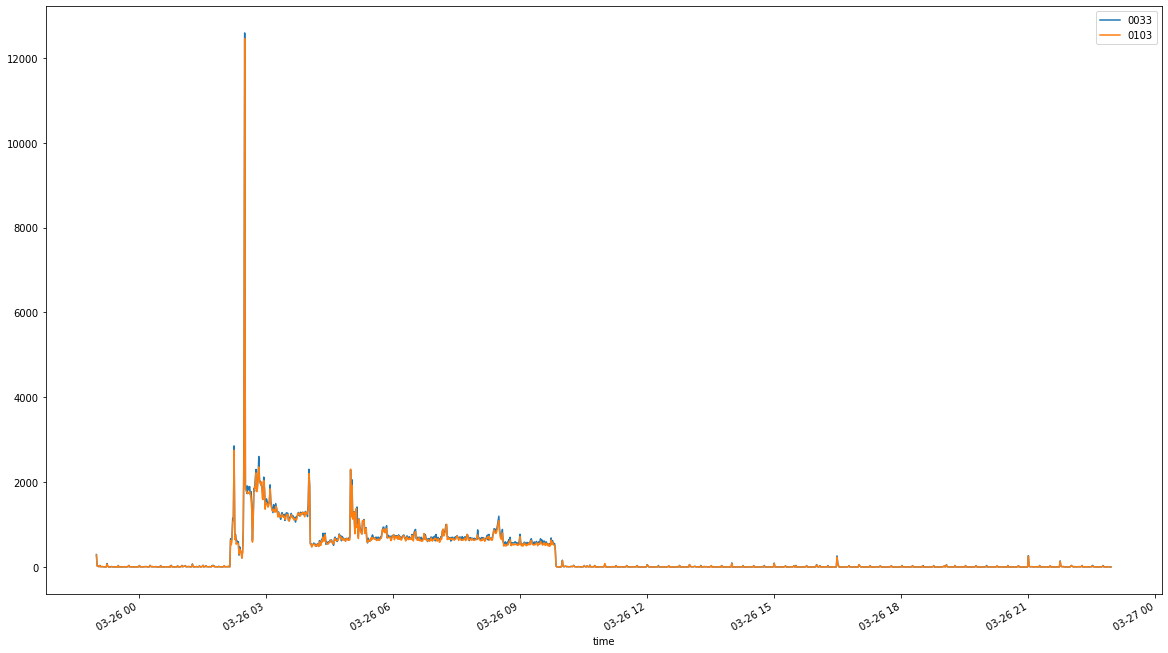

In [46]:
print(piod.hosts['0033'])
port_io[['0033','0103']].plot();

In [17]:
piod.sort_values(by=['std'],ascending=True)

NameError: name 'piod' is not defined

In [163]:
piod = pd.DataFrame(port_io.mean().T, columns=['Mean'])
piod['Max'] = port_io.max().T
piod['Min'] = port_io.min().T
piod['50%'] = port_io.quantile(q=0.5).T

piod

,Mean,Max,Min,50%
0001,80.511669,4198.78,0.23,7.040
0030,3936.826627,10879.45,1146.47,3886.500
0031,222.835814,3225.25,0.22,9.230
0032,7.956398,222.33,4.28,6.250
0033,295.279784,12581.23,4.93,12.385
0100,2946.759910,8000.27,953.28,2901.990
0101,211.704624,3235.63,0.12,6.310
0102,14.377197,756.78,4.67,7.450
0103,284.369207,12450.02,4.98,11.800
0130,599.161453,2410.57,183.78,509.300


In [ ]:
# histogram of  data
data = port_io.
pyplot.hist(data)

the standard deviation is a measure of the amount of variation or dispersion of a set of values.
A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range.